<a href="https://colab.research.google.com/github/arvndms/ICT-DSA_ACTIVITY/blob/main/Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📓 Linear Regression from Scratch

### 🎯 Objective
- Implement a linear regression model using gradient descent.
- Derive the gradient updates, write a scikit-learn-like class, and evaluate using synthetic data.
- Compare the result of the same with library code output
- Use R2-Score and Mean Absolute Percentage error as Performance metric on test data

## 📊 Generate Synthetic Data

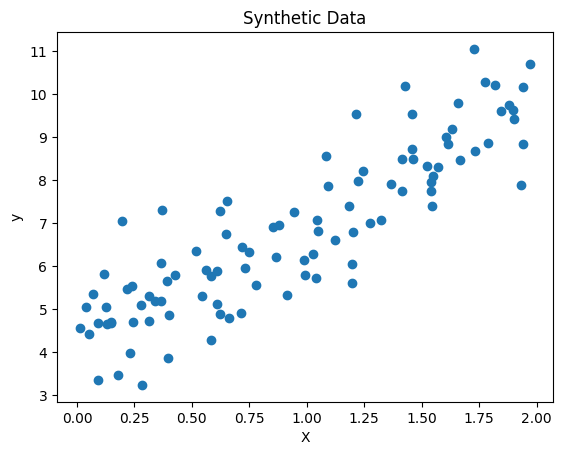

In [40]:

import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data")
plt.show()


## Do Train-Test Split (75%-25%)

In [41]:
# Write your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

## Do the Linear Regression with Scikit-Learn Library

In [42]:
# Write your code here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_percentage_error

In [43]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [44]:
print("R2 Score: ",r2_score(y_test,y_pred_lr))
print("MAPE",mean_absolute_percentage_error(y_test,y_pred_lr))

R2 Score:  0.8310990846073661
MAPE 0.08475682819153892


## Do Ridge and Lasso Regression and Compare the evaluation metrics in a table

In [45]:
# Write your code here
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha=1)
ridge.fit(X_train,y_train)
y_pred_ridge = ridge.predict(X_test)

In [46]:
lasso = Lasso(alpha=0.13)
lasso.fit(X_train,y_train)
y_pred_lasso = lasso.predict(X_test)


In [47]:
print('R2 score ridge',r2_score(y_test,y_pred_ridge))
print('MAPE ridge',mean_absolute_percentage_error(y_test,y_pred_ridge))

R2 score ridge 0.825998822332145
MAPE ridge 0.08241190200760747


In [48]:
print('R2 score lasso',r2_score(y_test,y_pred_lasso))
print('MAPE lasso',mean_absolute_percentage_error(y_test,y_pred_lasso))

R2 score lasso 0.798053990156418
MAPE lasso 0.08413341616181422


In [49]:
results = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'R2 Score': [r2_score(y_test,y_pred_lr),r2_score(y_test,y_pred_ridge),r2_score(y_test,y_pred_lasso)],
    'MAPE': [mean_absolute_percentage_error(y_test,y_pred_lr),mean_absolute_percentage_error(y_test,y_pred_ridge),mean_absolute_percentage_error(y_test,y_pred_lasso)]

}

In [50]:
import pandas as pd
results_df = pd.DataFrame(results)
results_df

,Model,R2 Score,MAPE
0,Linear Regression,0.831099,0.084757
1,Ridge Regression,0.825999,0.082412
2,Lasso Regression,0.798054,0.084133


## Custom Implementation

## 🧮 Derive the Gradient Updates
Use the chain rule to derive the gradients of the loss function (Mean Square Error):

$$ \text{Loss} = \frac{1}{N} \sum_{i=1}^{N} (y_i - (mx_i + c))^2 $$

Derive:
- ∂Loss/∂m
- ∂Loss/∂c

Write the derivation here/add screenshot of your derivation here:

 1) Loss Function
$$
\text{Loss} = \frac{1}{N} \sum_{i=1}^{N} (y_i - (m x_i + c))^2
$$

- Error Term
$$
e_i = y_i - (m x_i + c)
$$

- Now loss becomes
$$
\text{Loss} = \frac{1}{N} \sum e_i^2
$$

 2) Gradient slope m
$$
\frac{\partial \text{Loss}}{\partial m} = \frac{1}{N} \sum 2 e_i \cdot (-x_i)
= -\frac{2}{N} \sum_{i=1}^{N} x_i (y_i - (m x_i + c))
$$

3) Gradient intercept c
 $$
\frac{\partial \text{Loss}}{\partial c} = \frac{1}{N} \sum 2 e_i \cdot (-1)
= -\frac{2}{N} \sum_{i=1}^{N} (y_i - (m x_i + c))
$$
4) Gradient Descent Updates
$$
m := m - \eta \frac{\partial \text{Loss}}{\partial m}
= m + \frac{2\eta}{N} \sum_{i=1}^{N} x_i (y_i - (m x_i + c))
$$

$$
c := c - \eta \frac{\partial \text{Loss}}{\partial c}
= c + \frac{2\eta}{N} \sum_{i=1}^{N} (y_i - (m x_i + c))
$$

## 🧠 Custom Linear Regression Class

In [51]:

class MyLinearRegression:
    def __init__(self, m=0, c=0):
        self.m = m
        self.c = c
        self.coef_ = self.m
        self.intercept_ = self.c
        self.loss_history = []

    def fit(self, X, y, lr=0.01, n_iters=1000):
        X = np.array(X)
        y = np.array(y)
        N = len(y)

        for i in range(n_iters):
            y_pred = self.m * X + self.c
            errors = y - y_pred

            # Gradients
            dL_dm = -2/N * np.sum(X * errors)
            dL_dc = -2/N * np.sum(errors)

            # Update parameters
            self.m -= lr * dL_dm
            self.c -= lr * dL_dc

            # Compute and store loss
            loss = np.mean(errors**2)
            self.loss_history.append(loss)

        self.coef_ = self.m
        self.intercept_ = self.c

    def predict(self, X):
        X = np.array(X)
        return self.m * X + self.c

    def fit_transform(self, X, y, lr=0.01, n_iters=1000):
        self.fit(X, y, lr, n_iters)
        return self.predict(X)


## 🔁 Train the Model and Visualize the Fit

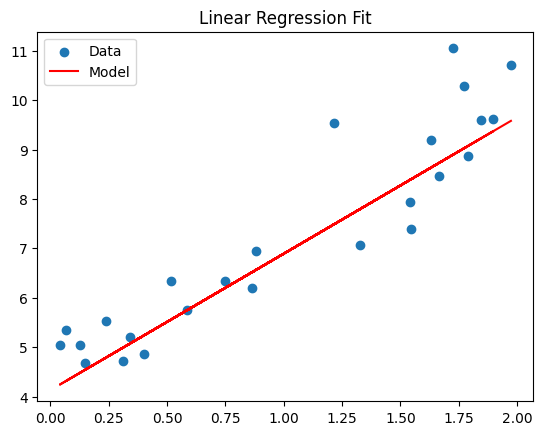

Learned coefficients (m, c): 2.760287211333097 4.131338540026423


In [52]:

model = MyLinearRegression()
model.fit(X_train, y_train, lr=0.1, n_iters=100)

# Predictions
y_pred = model.predict(X_test)

# Plot
plt.scatter(X_test, y_test, label="Data")
plt.plot(X_test, y_pred, color="red", label="Model")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()

# Print coefficients
print("Learned coefficients (m, c):", model.coef_,model.intercept_)


## 📉 Plot the Loss Curve

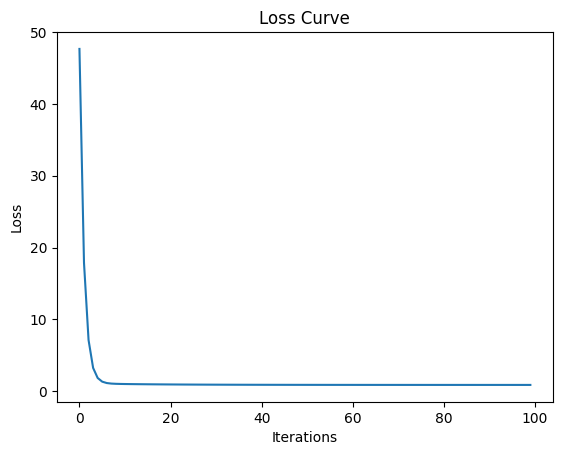

In [53]:
# Write your code here
plt.plot(model.loss_history)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()


## 🌟 Bonus Task: Stochastic Gradient Descent
Implement a class `MyLinearRegressionSGD` that uses one training sample per iteration to update weights.

In [67]:
# Write your code here
class MyLinearRegressionSGD:
  def __init__(self, learning_rate =0.01,n_epochs=1000,random_state=None):
    self.learning_rate = learning_rate
    self.n_epochs = n_epochs
    self.weight = None
    self.bias = None
    self.random_state = random_state
    self.loss_history = []

  def fit(self,X,y):
    X = np.array(X)
    y = np.array(y)

    n_samples, n_features = X.shape

    rng = np.random.default_rng(self.random_state) #initialize parameters
    self.weight = rng.normal(size=n_features) # small random weights
    self.bias = 0
    self.loss_history = []

    for _ in range(self.n_epochs):
      indices = np.random.permutation(n_samples) #shuffle indices each epochs
     # loop over 1  sample at a time
      for i in indices:
        x_i = X[i]
        y_i = y[i]
        y_pred = np.dot(X[i],self.weight) + self.bias # prediciton
        error = y_pred - y_i # error calculation
       # gradients
        dw =  2 * x_i * error
        db = 2 * error
       # update parameter
        self.weight -= self.learning_rate * dw
        self.bias -= self.learning_rate * db
        # to compute mse after each epoch
        y_pred_full = np.dot(X,self.weight) + self.bias
        mse = np.mean((y - y_pred_full)**2)
        self.loss_history.append(mse)

      return self

  def predict(self,X):
     X = np.array(X)
     return np.dot(X,self.weight) + self.bias





In [68]:
modelSGD = MyLinearRegressionSGD()
modelSGD.fit(X_train,y_train)
y_pred_sgd = modelSGD.predict(X_test)

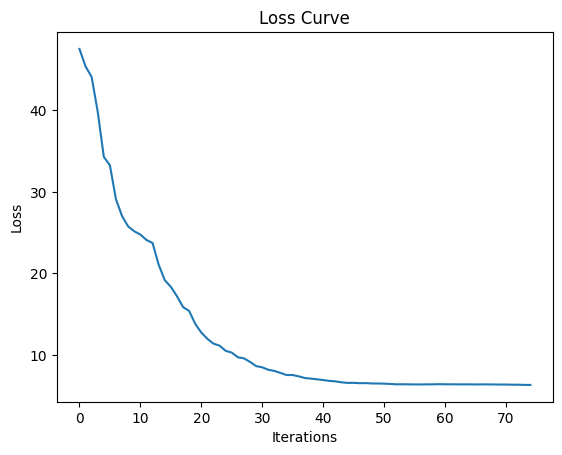

In [69]:
# Plot loss curve while using Stochastic Gradient Descent
plt.plot(modelSGD.loss_history)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()


## Visualize the prediction result of Library version and Custom regression code created

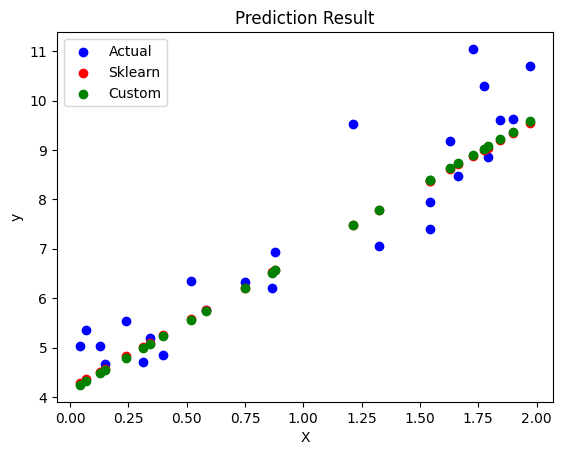

In [57]:
plt.scatter(X_test,y_test,color='blue',label='Actual')
plt.scatter(X_test,y_pred_lr,color='red',label='Sklearn')
plt.scatter(X_test,y_pred,color='green',label='Custom')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Prediction Result')
plt.legend()
plt.show()

## ✅ Checklist
- [x] Did linear regression using scikit-learn API
- [x] Did Ridge and Lasso regression and compiled the result (R2 and MAPE) as a table
- [x] Derived gradients using chain rule
- [x] Implemented custom Linear Regression class
- [x] Trained using gradient descent
- [x] Visualized predictions and loss
- [x] Implemented stochastic gradient descent (bonus)
- [x] Visualized predictions and loss for stochastic gradient descent (bonus)
- [x] Visualize the prediction result of Library version and custom version